<a href="https://colab.research.google.com/github/GunawanSelayar/DataMining/blob/main/dataminingfix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import **Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import joblib
import json
import csv
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
warnings.filterwarnings('ignore')

### PreProcessing Data


Informasi Missing Values:
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

 Total Data : 
(36, 7)

 kolom yang digunakan :
['Price', 'Open', 'High', 'Low']

 Data yang sudah dipreprocessing telah disimpan dalam file clean1.csv.

 Grafik Harga Dari Data baru  :



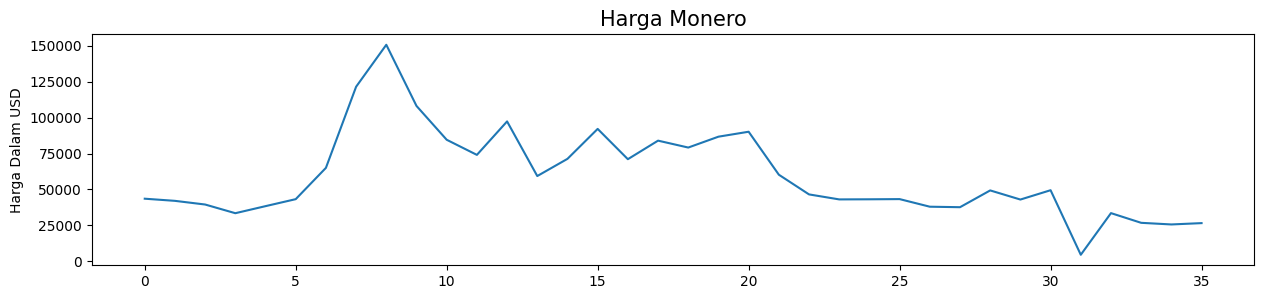


 Data baru  :



,Price,Open,High,Low
count,36.000000,36.000000,36.000000,36.000000
mean,78059.888889,78520.722222,101429.833333,59649.361111
std,45564.875052,45102.584495,76493.222968,30508.382412
min,27211.000000,27607.000000,28580.000000,4555.000000
25%,44877.750000,44877.750000,51296.250000,39259.250000
50%,69320.500000,69320.500000,84739.500000,47969.500000
75%,94858.500000,94764.250000,110006.000000,80401.250000
max,238281.000000,238281.000000,399000.000000,150744.000000


In [ ]:
def preprocess_and_save(csv_file_path, required_columns, output_csv_file):
    dfa = pd.read_csv(csv_file_path)
    acleaned_df = dfa[required_columns]
    acleaned_df_reversed = acleaned_df[::-1]
    acleaned_df_reversed.to_csv('clean.csv', index=False, decimal='.')

    df = pd.read_csv(csv_file_path, thousands='.', decimal=',')
    cleaned_df = df[required_columns]  # Select only the desired columns
    cleaned_df_reversed = cleaned_df[::-1]  # Reverse the order of rows
    cleaned_df_reversed.to_csv(output_csv_file, index=False, decimal='.')

csv_file_path = 'HuobiToken.csv'
required_columns = ['Price', 'Open', 'High', 'Low']
output_csv_file = 'clean1.csv'

preprocess_and_save(csv_file_path, required_columns, output_csv_file)

df = pd.read_csv(csv_file_path)
df.head()
print("\nInformasi Missing Values:")
print(df.isnull().sum())
print("\n Total Data : ")
print(df.shape)
print("\n kolom yang digunakan :")
print(required_columns)
print(f"\n Data yang sudah dipreprocessing telah disimpan dalam file {output_csv_file}.")

newdata = 'clean1.csv'
dta = pd.read_csv(newdata)


print("\n Grafik Harga Dari Data baru  :\n")


plt.figure(figsize=(15,3))
plt.plot(dta['Low'])
plt.title('Harga Monero', fontsize=15)
plt.ylabel('Harga Dalam USD')
plt.show()



print("\n Data baru  :\n")
dta.describe()

In [ ]:
data = pd.read_csv('clean1.csv')
target_column = 'Price'
feature_columns = ['Open','High','Low']
y = data[target_column]
X = data[feature_columns]
print(X.head(10))
print(y.head(10))

     Open    High     Low
0   44105   51540   43591
1   49417   51611   42097
2   46187   47554   39543
3   42344   45456   33495
4   41481   44996   38408
5   43658   69773   43276
6   68832  268643   65059
7  136850  177776  121535
8  155858  241506  150744
9  238281  399000  108173
0     49417
1     46187
2     42344
3     41481
4     43658
5     68832
6    136850
7    155858
8    238281
9    153979
Name: Price, dtype: int64


### Visualisasi Training Set Result


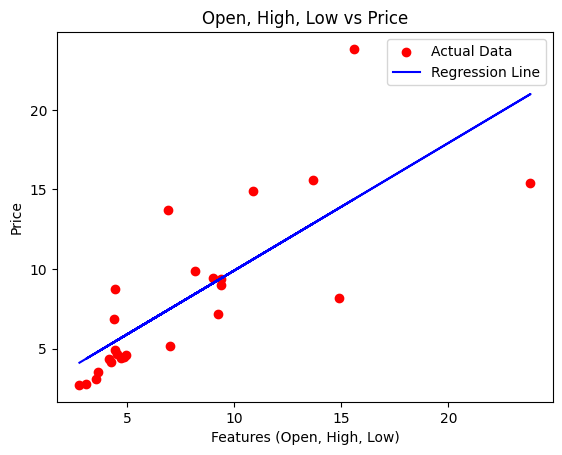

In [ ]:
data = pd.read_csv('clean.csv')
target_column = 'Price'
feature_columns = ['Open']
X = data[feature_columns]
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

plt.scatter(X_train, y_train, color='red', label='Actual Data')
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Regression Line')
plt.title('Open, High, Low vs Price')
plt.xlabel('Features (Open, High, Low)')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
def train_and_save_model(csv_file_path, target_column, feature_columns, model_file):
    df = pd.read_csv(csv_file_path)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(',', '.').astype(float)
    data = df[[target_column] + feature_columns]
    X = data[feature_columns]
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    model_dict = {
        'coefficients': model.coef_.tolist(),
        'intercept': model.intercept_
    }
    with open(model_file, 'w') as json_file:
        json.dump(model_dict, json_file)
    return model, y_test, y_pred, mse, r_squared

csv_file_path = 'clean1.csv'
target_column = 'Price'
feature_columns = ['Open', 'High', 'Low']
model_file = 'linear_regression_model.json'
model, y_test, y_pred, mse, r_squared = train_and_save_model(csv_file_path, target_column, feature_columns, model_file)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print(f"R-squared: {r_squared}")

Mean Absolute Error (MAE): 14887.399637351486
Mean Squared Error (MSE): 373784508.5430093
R-squared: 0.7096610424864491


In [ ]:
def str_to_float(s):
    return float(s.replace(",", ""))
def format_with_commas_and_decimal(num):
    formatted_num = "{:,.3f}".format(num)
    return formatted_num.rstrip("0").rstrip(".") if "." in formatted_num else formatted_num
def predict_price(data):
    return data[0] + 5  # Just an example, predicting the "Terakhir" column + 5
data_list = []
with open('clean1.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header row
    for row in reader:
        data_list.append([str_to_float(row[0]), str_to_float(row[1]), str_to_float(row[2]), str_to_float(row[3])])
predicted_prices = [predict_price(data) for data in data_list]
with open('predicted_prices.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Harga Asli', 'Hasil Prediksi'])
    for data, predicted_price in zip(data_list, predicted_prices):
        formatted_predicted_price = format_with_commas_and_decimal(predicted_price)
        writer.writerow([format_with_commas_and_decimal(data[0]),
                         formatted_predicted_price])
hasil1 = pd.read_csv('predicted_prices.csv')
hasil1.head(11)

,Harga Asli,Hasil Prediksi
0,"49,417","49,422"
1,"46,187","46,192"
2,"42,344","42,349"
3,"41,481","41,486"
4,"43,658","43,663"
5,"68,832","68,837"
6,"136,850","136,855"
7,"155,858","155,863"
8,"238,281","238,286"
9,"153,979","153,984"
